 Resolving package versions...
  Updating `/data/.julia-20190315/environments/v1.1/Project.toml`
 [no changes]
  Updating `/data/.julia-20190315/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...


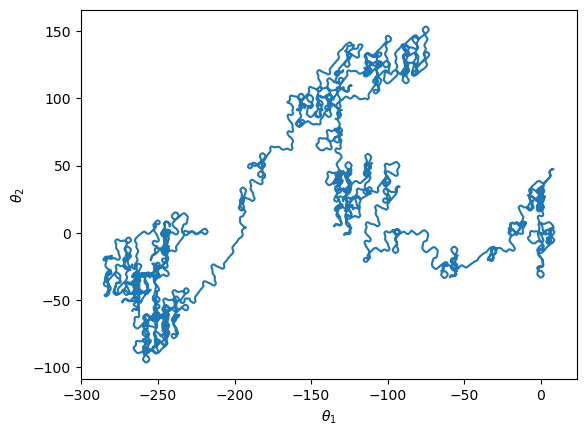

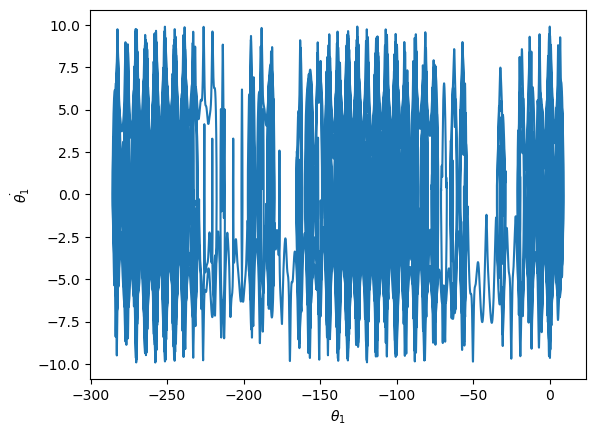

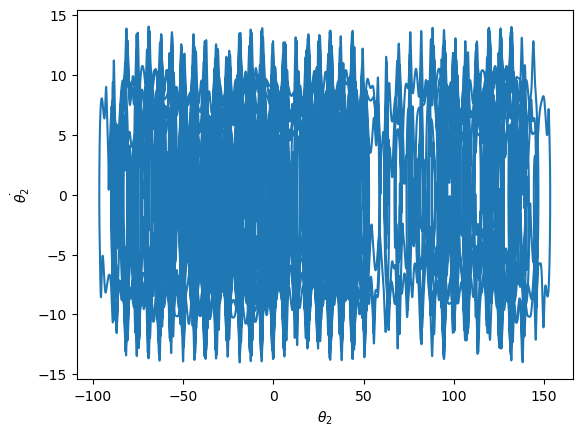

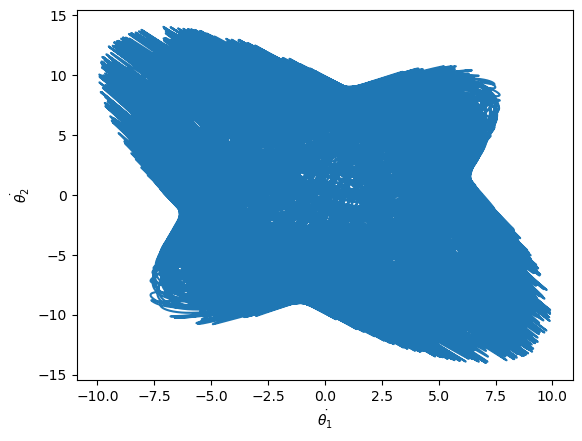

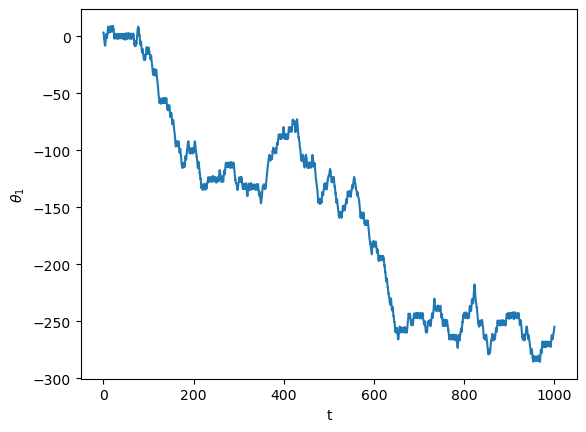

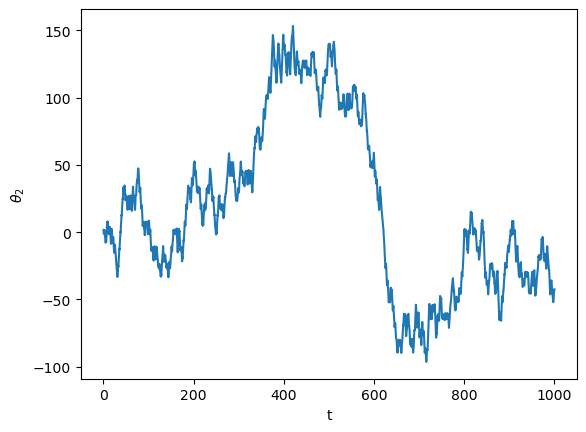

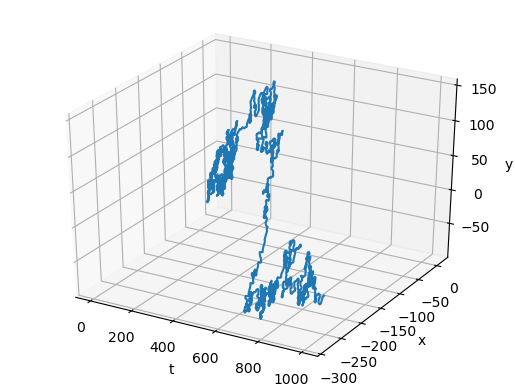

  Updating `/data/.julia-20190315/environments/v1.1/Project.toml`
 [no changes]
  Updating `/data/.julia-20190315/environments/v1.1/Manifest.toml`
 [no changes]


PyObject Text(0.09109821416582614, 0.012204846458825167, 'y')

In [2]:
# Import package manager
using Pkg;

# Install and import ODE
Pkg.add("ODE")
using ODE;

function f(t, r)
	# Extract the coordinates from the r vector
	(x, dx, y, dy) = r

	# The double pendulum equations
	dx_dt   = dx
	d2x_dt2 = - ((g * (2 * m1 + m2) * sin(x) + m2 * (g * sin(x-2*y) + 2*(l2 * (dy^2) + l1 * (dx^2) * cos(x-y)) * sin(x-y)))/(2 *l1 * (m1 + m2 - m2 * cos(x-y)^2)))
	dy_dt   = dy
	d2y_dt2 = (((m1 + m2) * (l1 * (dx^2) + g * cos(x)) + l2*m2*(dy^2)*cos(x-y)) * sin(x-y)) / (l2 * (m1 + m2 - m2 * cos(x-y)^2));

	# Return the derivatives as a vector
	[dx_dt; d2x_dt2; dy_dt; d2y_dt2]
end;

# Constants, I do like that I do not have to parse them manually to ode78
const m1   = 1
const m2   = 1
const g    = 9.8
const l1   = 1
const l2   = 1

# Define time vector and interval grid
const dt   = 0.001
const tf   = 1000.0
# A column vector containing discrete, dt-spaced, time values between 0 and tf
t          = 0:dt:tf

# Initial position in phase space
const r0   = [pi; 0.0; pi/2; 0.0]

# Solve the equations
(t, pos)   = ode78(f, r0, t)

# Map pos values to x, dx, y and dy
x          = map(v -> v[1], pos)
dx         = map(v -> v[2], pos)
y          = map(v -> v[3], pos)
dy         = map(v -> v[4], pos);

# Plot the data, against time and in phase space
# Get PyPlot and load it
Pkg.add("PyPlot")
using PyCall
pygui(:tk)
using PyPlot

PyPlot.figure(1)
PyPlot.plot(x, y)
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$")

PyPlot.figure(2)
PyPlot.plot(x, dx)
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\dot{\theta_1}$")

PyPlot.figure(3)
PyPlot.plot(y, dy)
PyPlot.xlabel(L"$\theta_2$")
PyPlot.ylabel(L"$\dot{\theta_2}$")

PyPlot.figure(4)
PyPlot.plot(dx,dy)
PyPlot.xlabel(L"$\dot{\theta_{1}}$")
PyPlot.ylabel(L"$\dot{\theta_{2}}$")

PyPlot.figure(5)
PyPlot.plot(t, x)
PyPlot.xlabel("t")
PyPlot.ylabel(L"$\theta_1$")

PyPlot.figure(6)
PyPlot.plot(t, y)
PyPlot.xlabel("t")
PyPlot.ylabel(L"$\theta_2$")

PyPlot.figure(7)
PyPlot.plot3D(t, x, y)
PyPlot.xlabel("t")
PyPlot.ylabel("x")
PyPlot.zlabel("y")


In [ ]:
# This is largely copied from the ODE.jl repository
# Import package manager
using Pkg;

# Install and import ODE
Pkg.add("ODE")
using ODE;

function f(t, r)
	# Extract the coordinates from the r vector
	(x, y, z) = r

	# The Lorenz equations
	dx_dt = sigma*(y - x)
	dy_dt = x*(rho - z) - y
	dz_dt = x*y - bet*z

	# Return the derivatives as a vector
	[dx_dt; dy_dt; dz_dt]
end;

# Define time vector and interval grid
const dt = 0.001
const tf = 1e3
t = 0:dt:tf

# Initial position in space
const r0 = [-2.0; 3.0; 0.5]

# Constants sigma, rho and beta
const sigma = 10.0
const rho   = 28.0
const bet   = 8.0/3.0;

(t, pos) = ode78(f, r0, t)
x = map(v -> v[1], pos)
y = map(v -> v[2], pos)
z = map(v -> v[3], pos);

# Get PyPlot and load it
Pkg.add("PyPlot")
using PyPlot

PyPlot.figure(1)
PyPlot.plot3D(x, y, z);
PyPlot.xlabel("x")
PyPlot.ylabel("y")
PyPlot.zlabel("z")

PyPlot.figure(2)
PyPlot.plot3D(t, x, y);
PyPlot.xlabel("t")
PyPlot.ylabel("x")
PyPlot.zlabel("y")

PyPlot.figure(3)
PyPlot.plot3D(t, y, z);
PyPlot.xlabel("t")
PyPlot.ylabel("y")
PyPlot.zlabel("z")

PyPlot.figure(4)
PyPlot.plot3D(t, x, z);
PyPlot.xlabel("t")
PyPlot.ylabel("x")
PyPlot.zlabel("z")


 Resolving package versions...


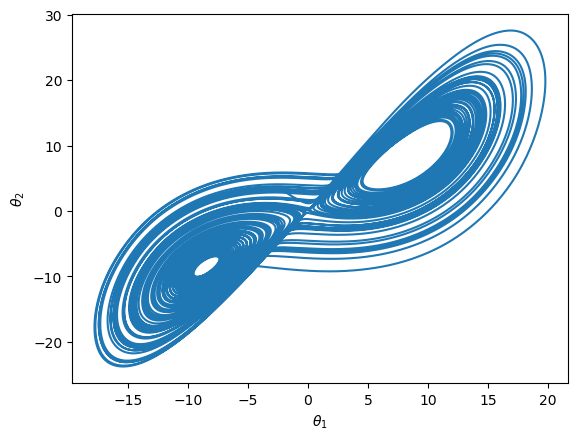

  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


PyObject Text(27.4, 0.5, '$\\theta_2$')

In [6]:
Pkg.add("PyPlot")
using PyCall
pygui(:gtk3)
using PyPlot

PyPlot.figure(1)
PyPlot.plot(x, y)
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$")

In [5]:
# This is largely copied from the ODE.jl repository
# Import package manager
using Pkg;

# Install and import ODE
Pkg.add("ODE")
using ODE;

function f(t, r)
	# Extract the coordinates from the r vector
	(x, y, z) = r

	# The multiscroll attractor
	dx_dt = a*(y - x)
	dy_dt = (c-a)*x-x*z+c*y
	dz_dt = x*y-b*z

	# Return the derivatives as a vector
	[dx_dt; dy_dt; dz_dt]
end;

# Define time vector and interval grid
const dt = 1e-4
const tf = 1e2
t = 0:dt:tf

# Initial position in space
const r0 = [-0.1; 0.5; -0.6]

# Constants sigma, rho and beta
const a     = 40.0
const c     = 28.0
const b     = 3.0

(t, pos) = ode78(f, r0, t)
x = map(v -> v[1], pos)
y = map(v -> v[2], pos)
z = map(v -> v[3], pos);

# Get PyPlot and load it
Pkg.add("PyPlot")
using PyPlot

PyPlot.figure(1)
PyPlot.plot3D(x, y, z);
PyPlot.xlabel("x")
PyPlot.ylabel("y")
PyPlot.zlabel("z")

PyPlot.figure(2)
PyPlot.plot3D(t, x, y);
PyPlot.xlabel("t")
PyPlot.ylabel("x")
PyPlot.zlabel("y")

PyPlot.figure(3)
PyPlot.plot3D(t, y, z);
PyPlot.xlabel("t")
PyPlot.ylabel("y")
PyPlot.zlabel("z")

PyPlot.figure(4)
PyPlot.plot3D(t, x, z);
PyPlot.xlabel("t")
PyPlot.ylabel("x")
PyPlot.zlabel("z")


 Resolving package versions...
  Updating `/data/.julia-20190315/environments/v1.1/Project.toml`
 [no changes]
  Updating `/data/.julia-20190315/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...


  Updating `/data/.julia-20190315/environments/v1.1/Project.toml`
 [no changes]
  Updating `/data/.julia-20190315/environments/v1.1/Manifest.toml`
 [no changes]


PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /home/fusion809/.julia/packages/PyCall/ttONZ/src/pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('operands could not be broadcast together with remapped shapes [original->remapped]: (1000001,) and requested shape (2131,)')
  File "/usr/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py", line 1530, in plot
    zs = np.broadcast_to(zs, len(xs))
  File "/usr/lib/python3.7/site-packages/numpy/lib/stride_tricks.py", line 182, in broadcast_to
    return _broadcast_to(array, shape, subok=subok, readonly=True)
  File "/usr/lib/python3.7/site-packages/numpy/lib/stride_tricks.py", line 129, in _broadcast_to
    op_flags=[op_flag], itershape=shape, order='C')


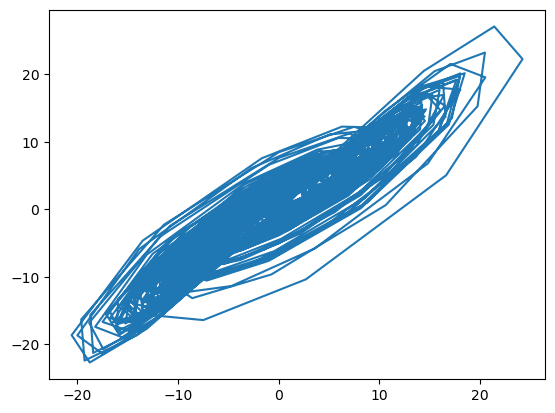

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffa95b81748>

In [2]:
plot(x,y)

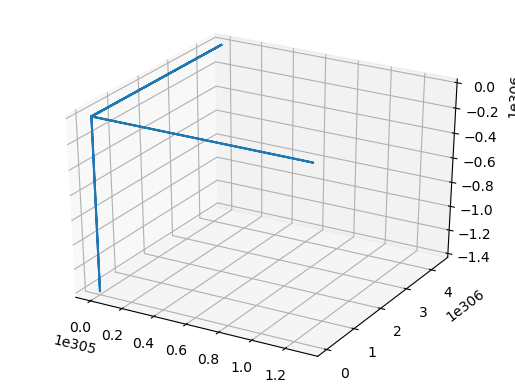

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7ffa95c90a20>

In [6]:
plot3D(x,y,z)

In [ ]:
# This is largely copied from the ODE.jl repository
# Import package manager
using Pkg;

# Install and import ODE
Pkg.add("ODE")
using ODE;

function f(t, r)
	# Extract the coordinates from the r vector
	(x, y, z) = r

	# The Rossler attractor
	dx_dt = -y-z
	dy_dt = x+a*y
	dz_dt = b+z*(x-c)

	# Return the derivatives as a vector
	[dx_dt; dy_dt; dz_dt]
end;

# Define time vector and interval grid
const dt = 1e-4
const tf = 1e2
t = 0:dt:tf

# Initial position in space
const r0 = [-0.1; 0.5; -0.6]

# Constants
const a     = 0.2
const b     = 0.2
const c     = 5.7

(t, pos) = ode78(f, r0, t)
x = map(v -> v[1], pos)
y = map(v -> v[2], pos)
z = map(v -> v[3], pos);

# Get PyPlot and load it
Pkg.add("PyPlot")
using PyPlot

PyPlot.figure(1)
PyPlot.plot3D(x, y, z);
PyPlot.xlabel("x")
PyPlot.ylabel("y")
PyPlot.zlabel("z")

PyPlot.figure(2)
PyPlot.plot3D(t, x, y);
PyPlot.xlabel("t")
PyPlot.ylabel("x")
PyPlot.zlabel("y")

PyPlot.figure(3)
PyPlot.plot3D(t, y, z);
PyPlot.xlabel("t")
PyPlot.ylabel("y")
PyPlot.zlabel("z")

PyPlot.figure(4)
PyPlot.plot3D(t, x, z);
PyPlot.xlabel("t")
PyPlot.ylabel("x")
PyPlot.zlabel("z")